# Pre-proccessing via matrix factorization basic idea tests

In [2]:
from juliacall import Main as jl
jl.seval("""
         import Pkg
         ENV["JULIA_SSL_CA_ROOTS_PATH"]=""
         ENV["JULIA_PKG_USE_CLI_GIT"]=true
         Pkg.add(url=\"https://github.com/MPF-Optimization-Laboratory/KLLS.jl.git\")
         """)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


    Updating git-repo `https://github.com/MPF-Optimization-Laboratory/KLLS.jl.git`
   Resolving package versions...
  No Changes to `C:\Users\mking\.julia\environments\pyjuliapkg\Project.toml`
  No Changes to `C:\Users\mking\.julia\environments\pyjuliapkg\Manifest.toml`


In [6]:
from keras.datasets import mnist
(data, labels), (_, _) = mnist.load_data()
data = data/255;

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy import linalg as la
from sklearn.utils.extmath import randomized_svd
import sklearn.decomposition as skd

# Vectorization of data.
vec_data = np.zeros([28**2,np.shape(data)[0]])

for i in range(np.shape(data)[0]):
    vec_data[:,i] = (data[i,:,:]).flatten();

In [31]:
jl.seval("""
         using KLLS
         solve = KLLS.solve!
         rescale = KLLS.scale!
         maximize = KLLS.maximize!
         regularize = KLLS.regularize!
         dObj = KLLS.dObj!
         dGrad = KLLS.dGrad!
         """);

# Actual experiments

In [12]:
np.shape(vec_data.mean(1))

(784,)

In [25]:
X = (vec_data.T - vec_data.mean(1)).T
print(X.shape)

PCA = skd.PCA(n_components = 500,svd_solver='randomized').fit(X)

(784, 60000)


In [26]:
print(PCA)

PCA(n_components=500, svd_solver='randomized')


In [36]:
W = PCA.components_
test = X@(W.T)
b = X[:,0]

In [40]:
testmodel = jl.KLLSModel(test,b)
p = jl.solve(testmodel, logging=1,max_time= 300.0,max_iter = 2000)


KL regularized least-squares
   m =        784  bNrm = 7.1e+00
   n =        500  λ    = 1.5e-08
                   τ    = 1.0e+00

Solver parameters:
   atol = 6.1e-06  max time (sec) =     300
   rtol = 6.1e-06  target ∥r∥<ε   = 4.9e-05

   iter   dual Obj    ∥∇dObj∥          Δ      Δₐ/Δₚ  cg its      cg msg
      0  -1.00e+00   7.76e+00    1.0e+00   0.0e+00       0             
      1  -2.98e+00   6.97e+01    1.0e+00   9.4e-01       9            ⊕
      2  -2.98e+00   6.97e+01    5.4e-02  -6.6e+00       7            ⊕
      3  -2.98e+00   6.97e+01    2.9e-03  -1.7e+00       1            ⊕
      4  -3.15e+00   4.56e+01    4.3e-03   1.0e+00       1            ⊕
      5  -3.30e+00   2.81e+01    6.5e-03   1.1e+00       1            ⊕
      6  -3.45e+00   1.98e+01    9.8e-03   1.0e+00       1            ⊕
      7  -3.61e+00   1.44e+01    1.5e-02   1.0e+00       1            ⊕
      8  -3.79e+00   1.08e+01    2.2e-02   1.0e+00       1            ⊕
      9  -3.99e+00   8.14e+00    3.3e-0

In [55]:
print(np.shape(W))
print(np.shape(p.solution))

np.shape((W.T)@p.solution)

np.shape(X@((W.T)@p.solution)) 

(500, 60000)
(500,)


(784,)

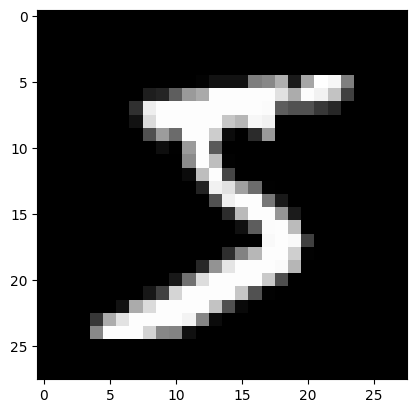

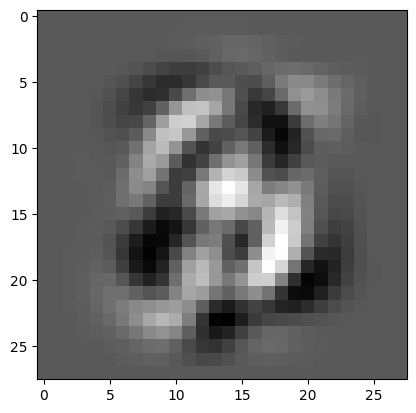

In [61]:
plt.figure()
plt.imshow((X[:,0] + vec_data.mean(1)).reshape(28,28),cmap='gray')
plt.figure()
plt.imshow((X@((W.T)@p.solution)).reshape(28,28),cmap='gray')
